# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country_name = []
date = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
record_counter=0
set_counter=0
base_url="http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"
url=base_url+"&appid="+weather_api_key+"&units="+units

In [ ]:
query_url=url+"&q="+cities[0]
response=requests.get(query_url).json()

In [14]:
print("-------------------------------------------")
print("Beginning Data Retrieval")
print("-------------------------------------------")
for city in cities:
    query_url=url+"&q="+city
    response=requests.get(query_url).json()
    if record_counter<50:
        time.sleep(40)
        record_counter+=1
    else:
        set_counter+=1
        record_counter=0

    try:
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country_name.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        print(f"Processing Record {record_counter} of set {set_counter} | {city}")

    except KeyError:
        print("no key")
    
print("END")

-------------------------------------------
Beginning Data Retrieval
-------------------------------------------
Processing Record 26 of set 0 | sao filipe
Processing Record 27 of set 0 | avarua
Processing Record 28 of set 0 | luvianos
Processing Record 29 of set 0 | douentza
Processing Record 30 of set 0 | atuona
Processing Record 31 of set 0 | kargopol
Processing Record 32 of set 0 | santa cruz
Processing Record 33 of set 0 | yar-sale
Processing Record 34 of set 0 | ribeira grande
Processing Record 35 of set 0 | saint-philippe
Processing Record 36 of set 0 | morant bay
Processing Record 37 of set 0 | luderitz
Processing Record 38 of set 0 | acapulco
Processing Record 39 of set 0 | nanortalik
Processing Record 40 of set 0 | west helena
Processing Record 41 of set 0 | sao gabriel da cachoeira
Processing Record 42 of set 0 | busselton
Processing Record 43 of set 0 | ushuaia
Processing Record 44 of set 0 | shaowu
Processing Record 45 of set 0 | korla
Processing Record 46 of set 0 | najra

Processing Record 28 of set 4 | waipawa
Processing Record 29 of set 4 | darnah
Processing Record 30 of set 4 | bilma
Processing Record 31 of set 4 | magadan
Processing Record 32 of set 4 | dunedin
Processing Record 33 of set 4 | noumea
Processing Record 34 of set 4 | praia
no key
Processing Record 36 of set 4 | omboue
Processing Record 37 of set 4 | finschhafen
Processing Record 38 of set 4 | pouembout
Processing Record 39 of set 4 | wewak
Processing Record 40 of set 4 | novopavlovka
Processing Record 41 of set 4 | mahebourg
Processing Record 42 of set 4 | saint-augustin
Processing Record 43 of set 4 | mukhen
Processing Record 44 of set 4 | petawawa
Processing Record 45 of set 4 | zanjan
Processing Record 46 of set 4 | wajid
Processing Record 47 of set 4 | oga
no key
Processing Record 49 of set 4 | sangar
Processing Record 50 of set 4 | puerto ayora
Processing Record 0 of set 5 | san rafael
Processing Record 1 of set 5 | naze
Processing Record 2 of set 5 | samarai
no key
Processing Rec

Processing Record 40 of set 8 | malanville
Processing Record 41 of set 8 | kabanjahe
Processing Record 42 of set 8 | tres arroyos
Processing Record 43 of set 8 | oranjemund
Processing Record 44 of set 8 | goderich
no key
Processing Record 46 of set 8 | salalah
Processing Record 47 of set 8 | sao jose da coroa grande
Processing Record 48 of set 8 | fez
Processing Record 49 of set 8 | hobyo
Processing Record 50 of set 8 | tongchuan
Processing Record 0 of set 9 | kenai
Processing Record 1 of set 9 | mpika
no key
Processing Record 3 of set 9 | embu
Processing Record 4 of set 9 | guarumal
Processing Record 5 of set 9 | linjiang
Processing Record 6 of set 9 | pinawa
Processing Record 7 of set 9 | kyaikkami
Processing Record 8 of set 9 | ruwi
Processing Record 9 of set 9 | maba
Processing Record 10 of set 9 | belaya gora
Processing Record 11 of set 9 | isiro
no key
Processing Record 13 of set 9 | tolaga bay
Processing Record 14 of set 9 | marawi
Processing Record 15 of set 9 | hamilton
Proces

END


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
print(len(latitude))
print(len(longitude))
print(len(temperature))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country_name))

599
599
599
599
599
599
599


In [17]:
city_list=({"City": city_name,
                       "Latitude": latitude,
                       "Longitude": longitude,
                       "Temperature": temperature,
                       "Humidity(%)": humidity,
                       "Cloudiness": cloudiness,
                       "Wind Speed": wind_speed,
                       "Country": country_name,
                       "Date": date
                                    })
city_df=pd.DataFrame(city_list)
city_df.head()

,City,Latitude,Longitude,Temperature,Humidity(%),Cloudiness,Wind Speed,Country,Date
0,morant bay,17.88,-76.41,82.99,88,42,1.01,JM,1603922850
1,luderitz,-26.65,15.16,60.60,67,90,13.47,NA,1603922791
2,acapulco,16.86,-99.89,84.87,70,48,7.76,MX,1603922930
3,nanortalik,60.14,-45.24,32.85,92,100,14.83,GL,1603922970
4,west helena,34.55,-90.64,62.60,100,100,5.82,US,1603923010


In [18]:
#TO RUN
city_df.to_csv(output_data_file)
city_df.to_excel("../weatherpy_retrieval.xlsx")

In [19]:
city_df=pd.read_excel("../weatherpy_retrieval.xlsx")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
city_df_clean=(city_df[city_df["Humidity(%)"]<100])
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

city_df_clean.head()

588


,Unnamed: 0,City,Latitude,Longitude,Temperature,Humidity(%),Cloudiness,Wind Speed,Country,Date
0,0,morant bay,17.88,-76.41,82.99,88,42,1.01,JM,1603922850
1,1,luderitz,-26.65,15.16,60.60,67,90,13.47,NaN,1603922791
2,2,acapulco,16.86,-99.89,84.87,70,48,7.76,MX,1603922930
3,3,nanortalik,60.14,-45.24,32.85,92,100,14.83,GL,1603922970
5,5,sao gabriel da cachoeira,-0.13,-67.09,81.01,81,100,1.70,BR,1603923050


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [30]:
latitude=city_df_clean["Latitude"]
temperature=city_df_clean["Temperature"]
humidity=city_df_clean["Humidity(%)"]
cloudiness=city_df_clean["Cloudiness"]
wind_speed=city_df_clean["Wind Speed"]

## Latitude vs. Temperature Plot

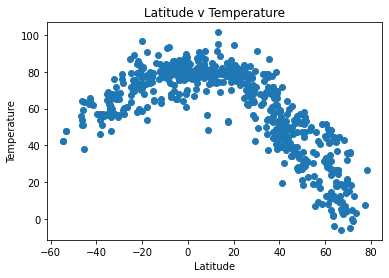

In [82]:
plt.scatter(latitude,temperature)
plt.title("Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature") 
plt.savefig("../Images/lat_temp.png")
plt.show()

There is an association with decreasing temperature when the latitude gets further from 0.

## Latitude vs. Humidity Plot

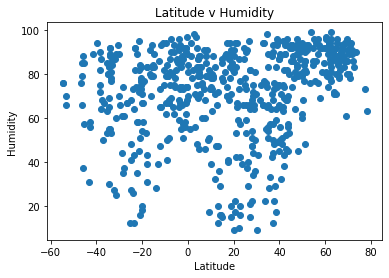

In [83]:
plt.scatter(latitude,humidity)
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/lat_humid.png")
plt.show()    

There is a weak but feasible positive association between lattitude and humidity

## Latitude vs. Cloudiness Plot

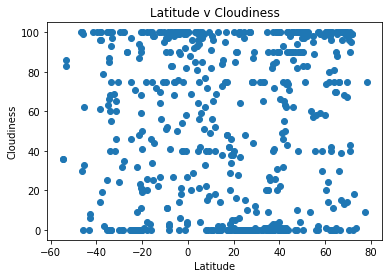

In [84]:
plt.scatter(latitude,cloudiness)
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/lat_cloudiness.png")
plt.show()   

There looks to be no association between latitude and cloudiness

## Latitude vs. Wind Speed Plot

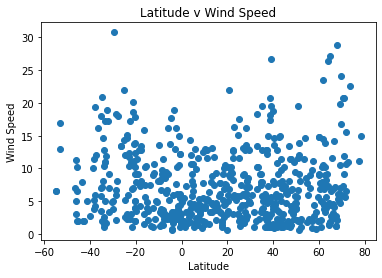

In [85]:
plt.scatter(latitude,wind_speed)
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../Images/lat_wind_speed.png")
plt.show()

There looks to be no association between latitude and wind speed.

## Linear Regression

In [75]:
north_hem=city_df_clean.loc[city_df_clean["Latitude"]>=0]
south_hem=north_hem=city_df_clean.loc[city_df_clean["Latitude"]<0]

,Unnamed: 0,City,Latitude,Longitude,Temperature,Humidity(%),Cloudiness,Wind Speed,Country,Date
1,1,luderitz,-26.65,15.16,60.60,67,90,13.47,NaN,1603922791
5,5,sao gabriel da cachoeira,-0.13,-67.09,81.01,81,100,1.70,BR,1603923050
6,6,busselton,-33.65,115.33,57.00,53,0,10.96,AU,1603923090
7,7,ushuaia,-54.80,-68.30,42.08,76,36,6.62,AR,1603923081
12,12,hithadhoo,-0.60,73.08,82.99,74,4,12.17,MV,1603923150


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue=0.72


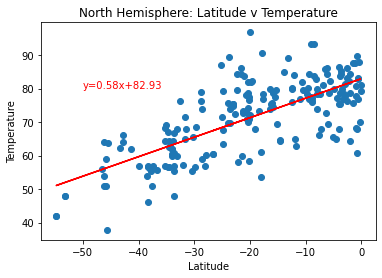

In [94]:
x_val=north_hem["Latitude"]
y_val=north_hem["Temperature"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val,y_val)
regress_val=x_val*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,80),color="red")
plt.title("North Hemisphere: Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"rvalue={round(rvalue,2)}")
plt.savefig("../Images/north_hem_temp.png")
plt.show()

There is an ok positive correlation between those locations in the north hemispheres and increasing temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue=0.72


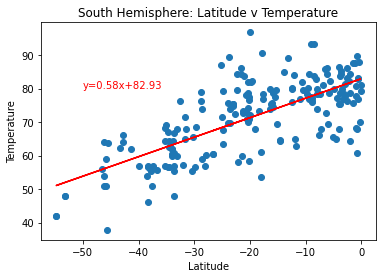

In [95]:
x_val=south_hem["Latitude"]
y_val=south_hem["Temperature"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val,y_val)
regress_val=x_val*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,80),color="red")
plt.title("South Hemisphere: Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"rvalue={round(rvalue,2)}")
plt.savefig("../Images/south_hem_temp.png")
plt.show()

There is a weak but feasible positive correlation between those locations in the south hemispheres and increasing temperatures 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue=0.15


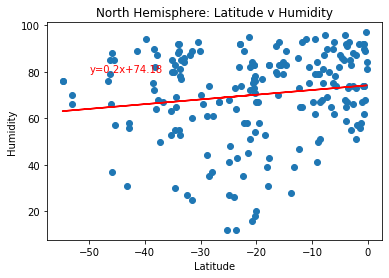

In [96]:
x_val=north_hem["Latitude"]
y_val=north_hem["Humidity(%)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val,y_val)
regress_val=x_val*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,80),color="red")
plt.title("North Hemisphere: Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"rvalue={round(rvalue,2)}")
plt.savefig("../Images/north_hem_humid.png")
plt.show()

There is no correlation between those locations in the north hemispheres and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue=0.15


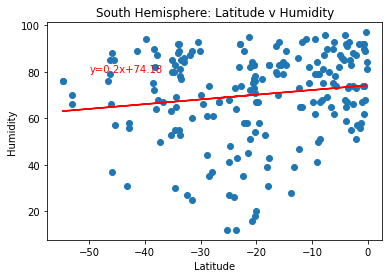

In [91]:
x_val=south_hem["Latitude"]
y_val=south_hem["Humidity(%)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val,y_val)
regress_val=x_val*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,80),color="red")
plt.title("South Hemisphere: Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"rvalue={round(rvalue,2)}")
plt.savefig("../Images/south_hem_humid.png")
plt.show()

There is no correlation between those locations in the south hemispheres and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue=0.11


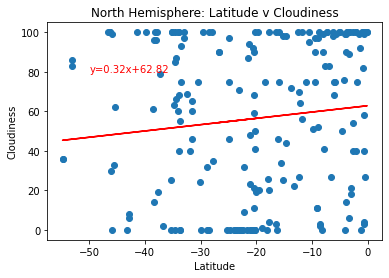

In [97]:
x_val=north_hem["Latitude"]
y_val=north_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val,y_val)
regress_val=x_val*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,80),color="red")
plt.title("North Hemisphere: Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"rvalue={round(rvalue,2)}")
plt.savefig("../Images/north_hem_cloudiness.png")
plt.show()

There is no correlation between those locations in the north hemispheres and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue=0.11


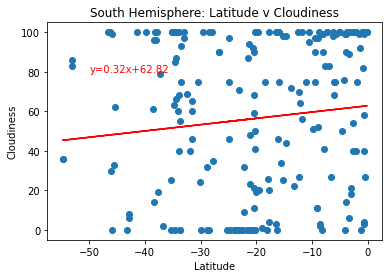

In [98]:
x_val=south_hem["Latitude"]
y_val=south_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val,y_val)
regress_val=x_val*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,80),color="red")
plt.title("South Hemisphere: Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"rvalue={round(rvalue,2)}")
plt.savefig("../Images/south_hem_cloudiness.png")
plt.show()

There is no correlation between those locations in the south hemispheres and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue=-0.18


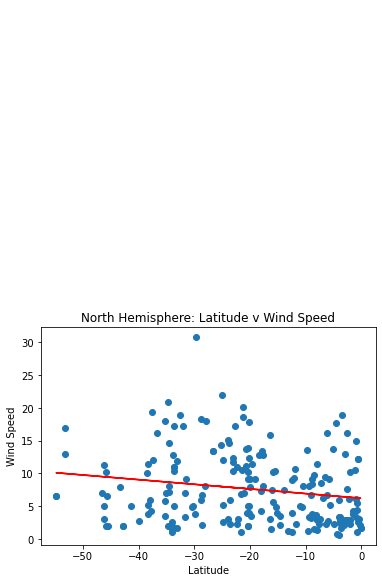

In [99]:
x_val=north_hem["Latitude"]
y_val=north_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val,y_val)
regress_val=x_val*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,80),color="red")
plt.title("North Hemisphere: Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"rvalue={round(rvalue,2)}")
plt.savefig("../Images/north_hem_wind_speed.png")
plt.show()

There is no correlation between those locations in the north hemispheres and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue=-0.18


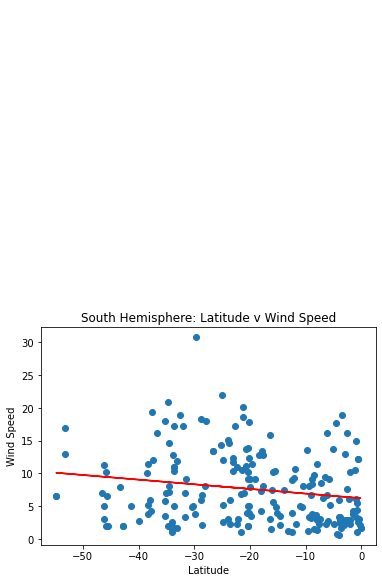

In [100]:
x_val=south_hem["Latitude"]
y_val=south_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val,y_val)
regress_val=x_val*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,80),color="red")
plt.title("South Hemisphere: Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"rvalue={round(rvalue,2)}")
plt.savefig("../Images/south_hem_wind_speed.png")
plt.show()

There is no correlation between those locations in the south hemispheres and wind speed.